<a href="https://colab.research.google.com/github/anur8591/ML-loan_approve_model/blob/main/Anur_logisticreg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#loading dataset
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full_final - TA Ajinkya.csv to bank-additional-full_final - TA Ajinkya.csv


In [1]:
# libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#performing EDA
df = pd.read_csv('bank-additional-full_final - TA Ajinkya.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
df.duplicated().sum()

np.int64(1784)

In [8]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

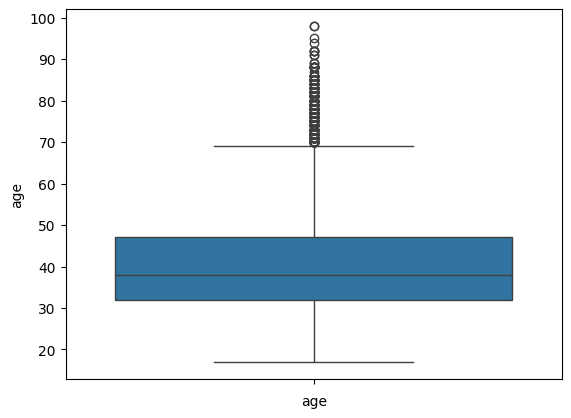

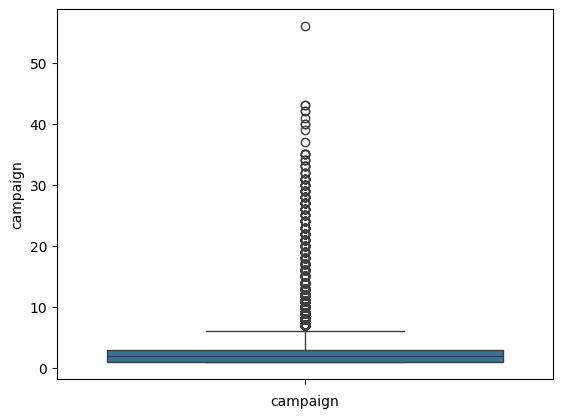

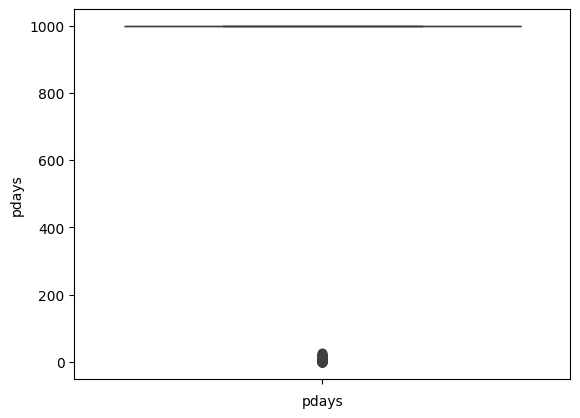

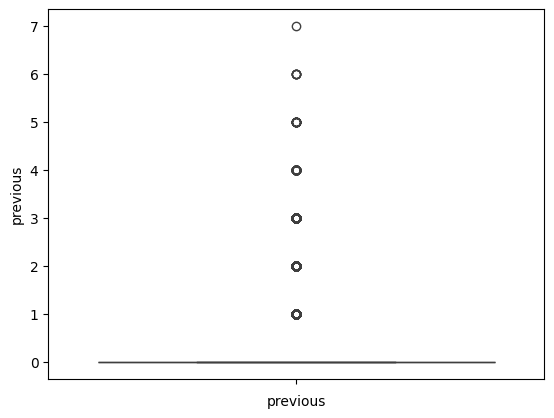

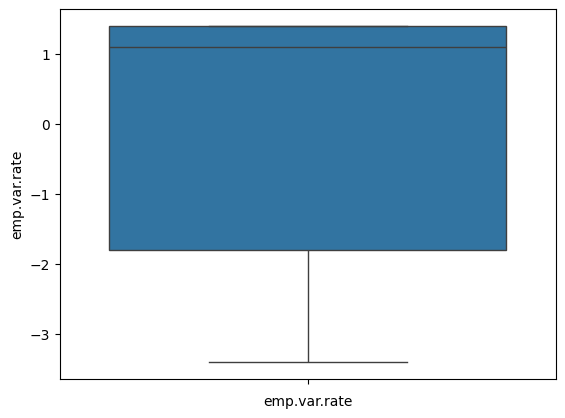

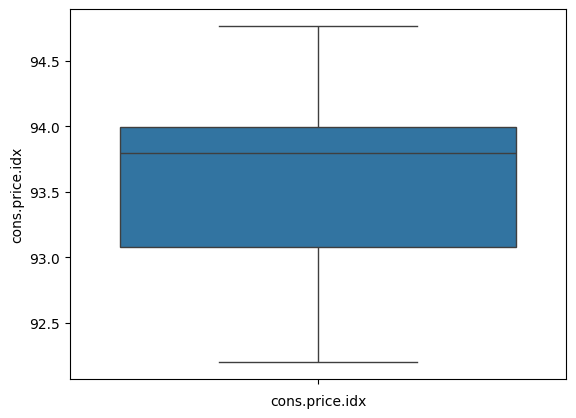

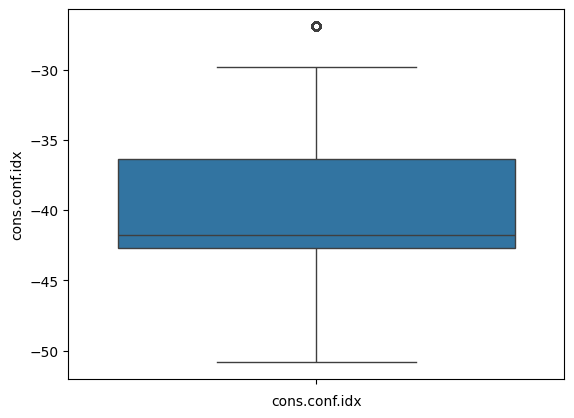

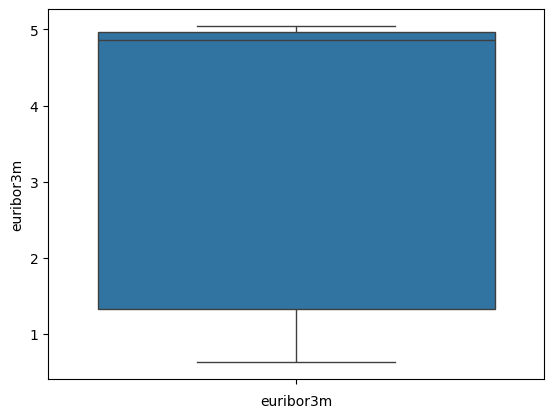

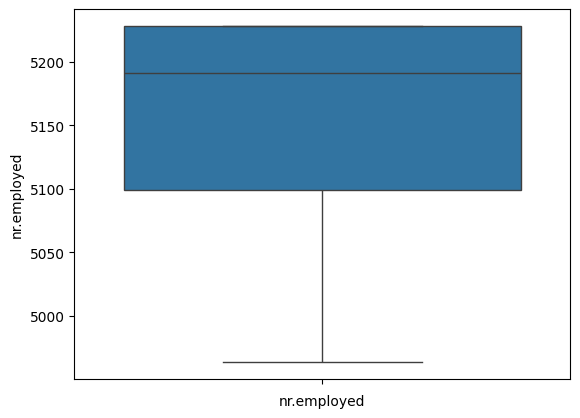

In [10]:
for i in df.columns:
  if df[i].dtype != 'object':
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()



In [14]:
out = ['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

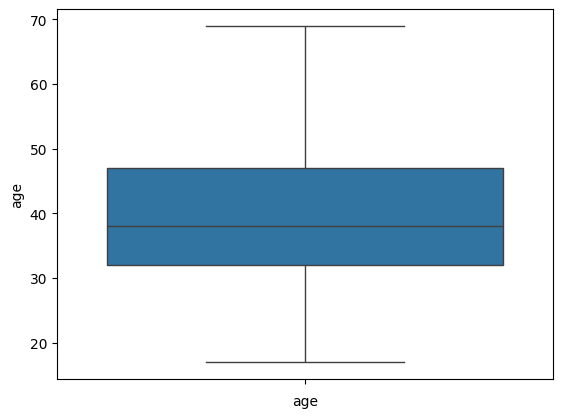

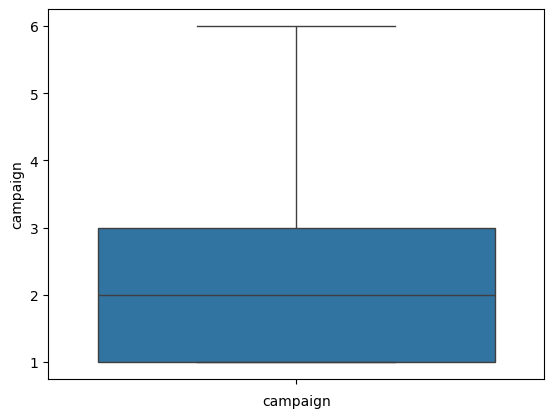

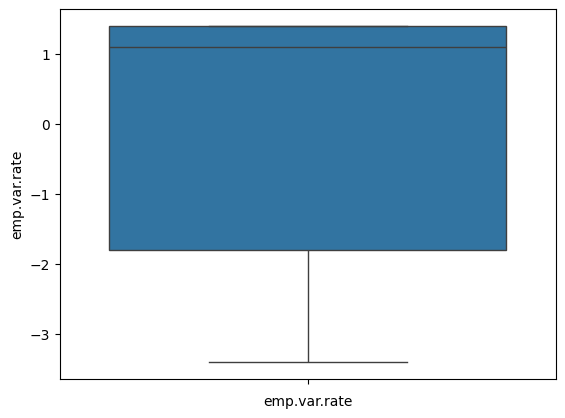

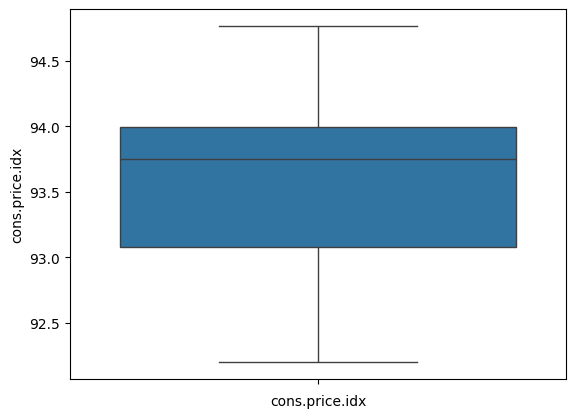

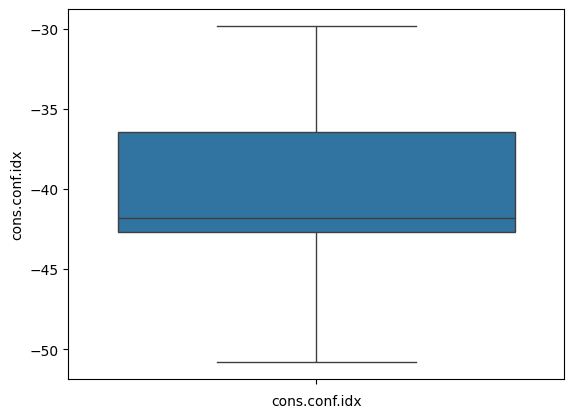

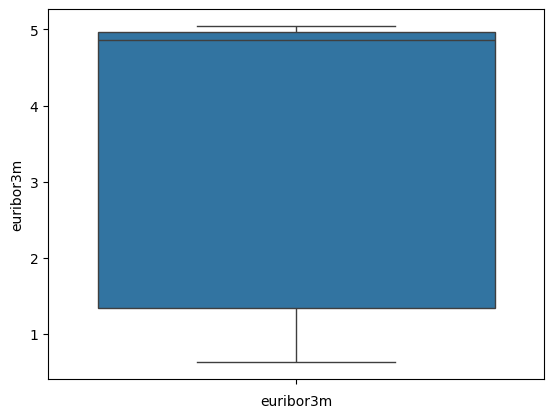

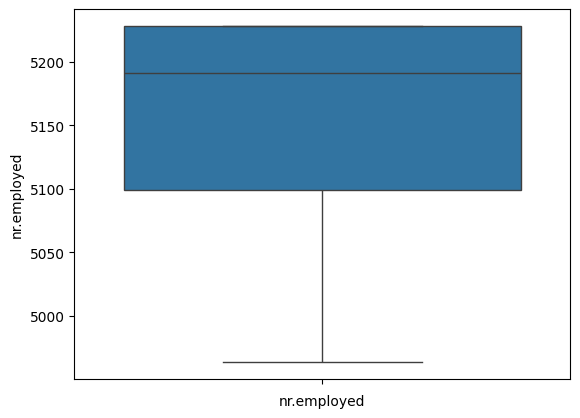

In [23]:
for i in out:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)

  iqr = q3-q1

  lb = q1 - 1.5*iqr
  ub = q3 + 1.5*iqr

  df = df[(df[i]>=lb)&(df[i]<=ub)]

  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

In [31]:
#label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])


In [32]:
# transformed object into numerical

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,6,0,2,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41182,29,10,2,0,0,2,0,0,7,0,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


In [33]:
# removing output column from dataset
x = df.drop('y', axis = 1)
y = df['y']

In [46]:
# data spliting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 23, train_size = 0.70)

In [47]:
# importing model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
# prediction
y_pred = model.predict(x_test)

from sklearn.metrics import *
accuracy_score(y_test, y_pred)*100

89.81020821816841

In [52]:
confusion_matrix(y_test, y_pred)

array([[9502,   92],
       [1014,  246]])

In [54]:
import joblib

joblib.dump(model, 'loan_approve.pkl')

['loan_approve.pkl']